<a href="https://colab.research.google.com/github/Joykareko/Data-Science-Projects/blob/main/Stock_Price_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#importing dependencies
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [32]:
#obtaining data from an API
df = pdr.get_data_tiingo('AAPL',api_key = '1619014d6663909145590ae6adcc1278cd3a9c92')
df.to_csv('AAPL.csv')

In [33]:
#loading the data using pandas
df = pd.read_csv('AAPL.csv')

In [34]:
df.head(3)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-09-12 00:00:00+00:00,105.44,105.72,102.53,102.65,45292770,24.717011,24.782648,24.034855,24.062985,181171080,0.0,1.0
1,AAPL,2016-09-13 00:00:00+00:00,107.95,108.79,107.24,107.51,62176190,25.305400,25.502310,25.138963,25.202256,248704760,0.0,1.0
2,AAPL,2016-09-14 00:00:00+00:00,111.77,113.03,108.60,108.73,112340318,26.200875,26.496242,25.457771,25.488245,449361272,0.0,1.0


In [35]:
df.tail(3)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-09-03 00:00:00+00:00,154.30,154.63,153.090,153.76,57866066,154.30,154.63,153.090,153.76,57866066,0.0,1.0
1255,AAPL,2021-09-07 00:00:00+00:00,156.69,157.26,154.390,154.97,82278261,156.69,157.26,154.390,154.97,82278261,0.0,1.0
1256,AAPL,2021-09-08 00:00:00+00:00,155.11,157.04,153.975,156.98,74420207,155.11,157.04,153.975,156.98,74420207,0.0,1.0


In [36]:
df = df['close']

In [37]:
df.shape

(1257,)

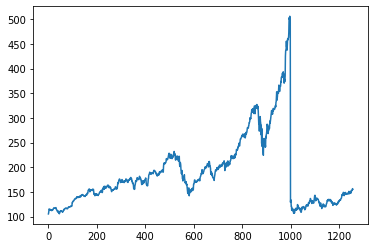

In [38]:
plt.plot(df)

In [39]:
#since machines do not work well with large numbers, we need to scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
df.shape

(1257, 1)

In [43]:
training_size = int(len(df)*0.65)
test_size = len(df)-training_size
train_data,test_data = df[0:training_size,:],df[training_size:len(df),:1]
training_size,test_size

(817, 440)

In [45]:
def create_dataset(dataset,time_step=1):
    data_X,data_Y = [],[]
    for i in range(len(dataset)-time_step-1):
      a= dataset[i:(i+time_step),0]
      data_X.append(a)
      data_Y.append(dataset[i+time_step,0])
    return np.array(data_X),np.array(data_Y)


In [46]:
time_step = 100
X_train,Y_train = create_dataset(train_data,time_step)
X_test,Y_test = create_dataset(test_data,time_step)


In [47]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(716, 100) (716,) (339, 100) (339,)


In [48]:
print(X_train)

[[0.         0.00626482 0.01579933 ... 0.03971047 0.05818046 0.05763135]
 [0.00626482 0.01579933 0.02528391 ... 0.05818046 0.05763135 0.05900412]
 [0.01579933 0.02528391 0.02366155 ... 0.05763135 0.05900412 0.06202421]
 ...
 [0.24902034 0.24724822 0.24437789 ... 0.40386871 0.39615625 0.38440035]
 [0.24724822 0.24437789 0.25014352 ... 0.39615625 0.38440035 0.39011606]
 [0.24437789 0.25014352 0.24248097 ... 0.38440035 0.39011606 0.39970049]]


In [49]:
#reshpaing our X_train
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
print(X_train.shape)

(716, 100, 1)


In [50]:
#creating the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [52]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')


In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs = 100,batch_size = 64,verbose = 1)


Epoch 1/100
12/12 [==============================] - 9s 297ms/step - loss: 0.0105 - val_loss: 0.0353
Epoch 2/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0021 - val_loss: 0.0245
Epoch 3/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0011 - val_loss: 0.0212
Epoch 4/100
12/12 [==============================] - 2s 186ms/step - loss: 6.5674e-04 - val_loss: 0.0217
Epoch 5/100
12/12 [==============================] - 2s 187ms/step - loss: 5.0227e-04 - val_loss: 0.0227
Epoch 6/100
12/12 [==============================] - 2s 187ms/step - loss: 4.6761e-04 - val_loss: 0.0211
Epoch 7/100
12/12 [==============================] - 2s 185ms/step - loss: 4.4327e-04 - val_loss: 0.0202
Epoch 8/100
12/12 [==============================] - 2s 183ms/step - loss: 4.2676e-04 - val_loss: 0.0213
Epoch 9/100
12/12 [==============================] - 2s 185ms/step - loss: 4.0669e-04 - val_loss: 0.0200
Epoch 10/100
12/12 [==============================] - 2s 185ms/step

In [56]:
import tensorflow as tf

In [57]:
#predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [58]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [61]:
#checking the performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))



185.79443152246864

In [62]:
#test data
math.sqrt(mean_squared_error(Y_test,test_predict))


213.8486523930958